**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Copiamos a funcao do lab04 
def apply_gaussian_filter(img, sigma, size=5):
    def gauss(x, y, sigma):
        factor = 1 / (2 * np.pi * sigma**2)
        return factor * np.exp(-(x**2 + y**2) / (2 * sigma**2))

    mask = np.zeros((size, size))
    center = size // 2
    for x in range(size):
        for y in range(size):
            x_dist = x - center
            y_dist = y - center
            mask[x, y] = gauss(x_dist, y_dist, sigma)

    mask /= np.sum(mask)
    row, col = img.shape
    new_img = np.zeros((row, col))
    pad_image = np.pad(img, (center, center), mode='constant', constant_values=0)
    for i in range(row):
        for j in range(col):
            neighbors = pad_image[i:i+size, j:j+size]
            new_img[i, j] = np.sum(neighbors * mask)
    
    return new_img

def conv(dimension:int, img, operator):
    new_img = img.copy()
    dxy = int(dimension // 2) # mediana do valor (mcc pura)
    rows, cols = img.shape
    padded_image = np.pad(img, (dxy, dxy), mode='constant', constant_values=0)
    for i in range(rows):
        for j in range(cols):
            neighbors = padded_image[i:i+dimension, j:j+dimension]
            new_img[i,j] = np.sum(neighbors*operator)
    new_img[new_img > 255] =  255
    new_img[new_img < 0] = 0
    return np.float64(new_img)

1) Aplique os filtros  Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

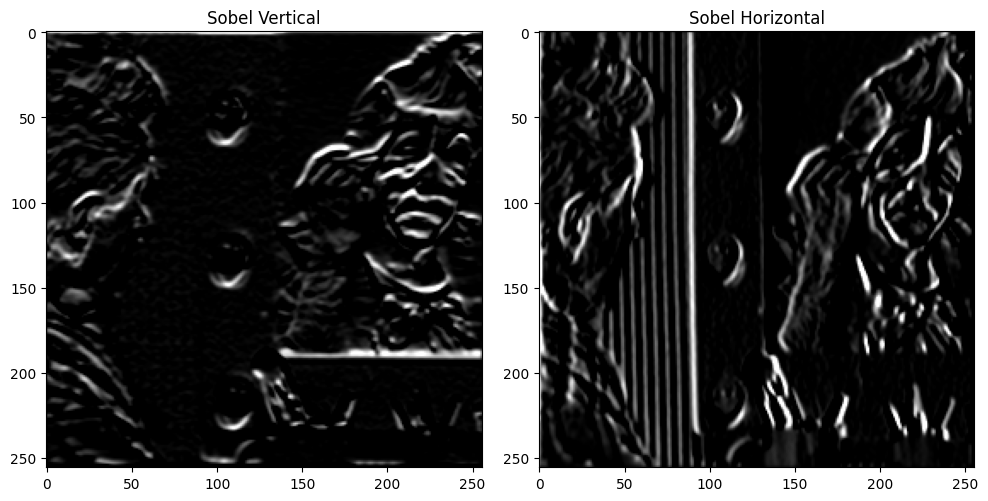

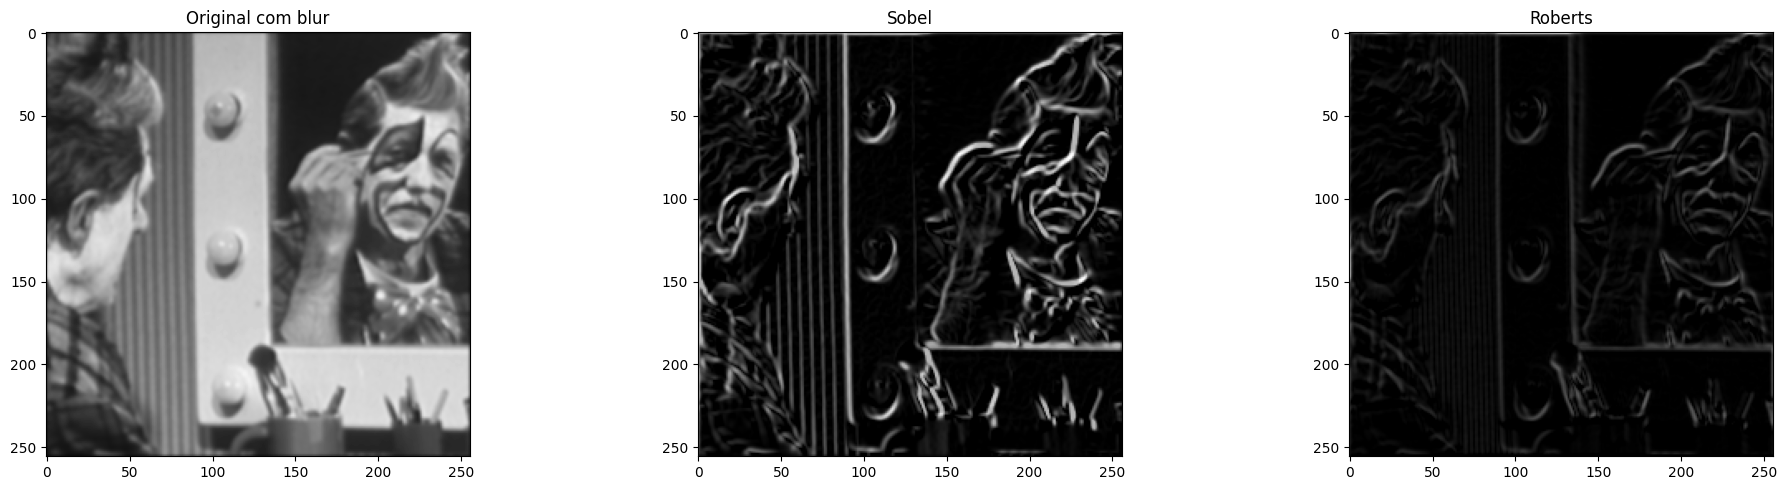

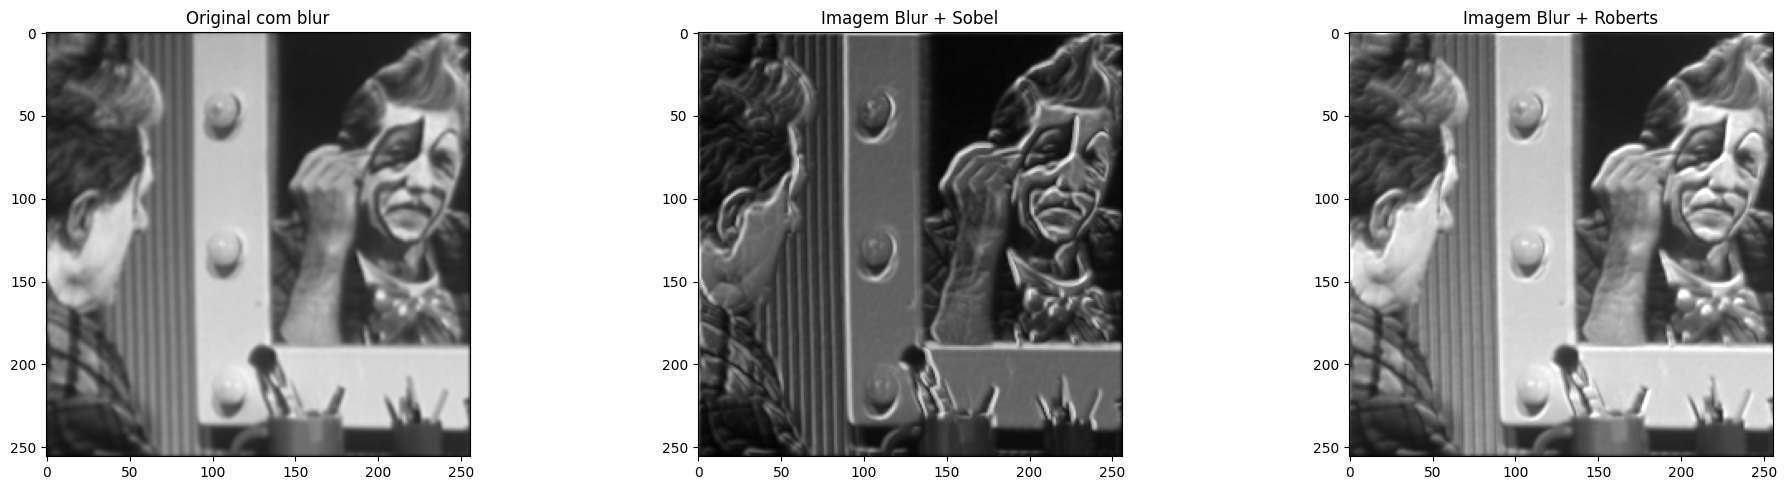

In [84]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def sobel(img):
    h1 = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])
    h2 = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    return np.float64(conv(3,img,h1)), np.float64(conv(3,img,h2))

def roberts(img):
    h1 = np.array([[-1, 0],
                   [ 0, 1]])
    h2 = np.array([[ 0, -1],
                   [ 1, 0]])
    result = np.sqrt((np.float64(conv(2,img,h1))**2) + (np.float64(conv(2,img,h2))**2))
    return np.uint8(255*result/np.max(result)) 

img1_original = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img1 = apply_gaussian_filter(img1_original, 1.0, 5) #Desfoque gaussiano porque a imagem tem muito ruido\
img2vertical, img2horizontal = sobel(img1)
img3 = roberts(img1)

# SOBEL VERTICAL E HORIZONTAL
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img2vertical, cmap='gray')
plt.title('Sobel Vertical')

plt.subplot(1, 2, 2)
plt.imshow(img2horizontal, cmap='gray')
plt.title('Sobel Horizontal')
plt.tight_layout()
plt.show()

# ORIGINAL BLUR/ SOBEL MASK/ ROBERTS MASK
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Original com blur')

plt.subplot(1, 3, 2)
plt.imshow(np.sqrt(img2vertical**2 + img2horizontal**2), cmap='gray')
plt.title('Sobel')

plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title('Roberts')
plt.tight_layout()
plt.show()

# ORIGINAL BLUR/ BLUR + SOBEL/ BLUR + ROBERTS
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.title('Original com blur')

plt.subplot(1, 3, 2)
plt.imshow(img1+np.sqrt(img2vertical**2 + img2horizontal**2), cmap='gray')
plt.title('Imagem Blur + Sobel')

plt.subplot(1, 3, 3)
plt.imshow(img1+img3, cmap='gray', vmin=0, vmax=255)
plt.title('Imagem Blur + Roberts')
plt.tight_layout()
plt.show()

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

Text(0.5, 1.0, 'La Place Realce')

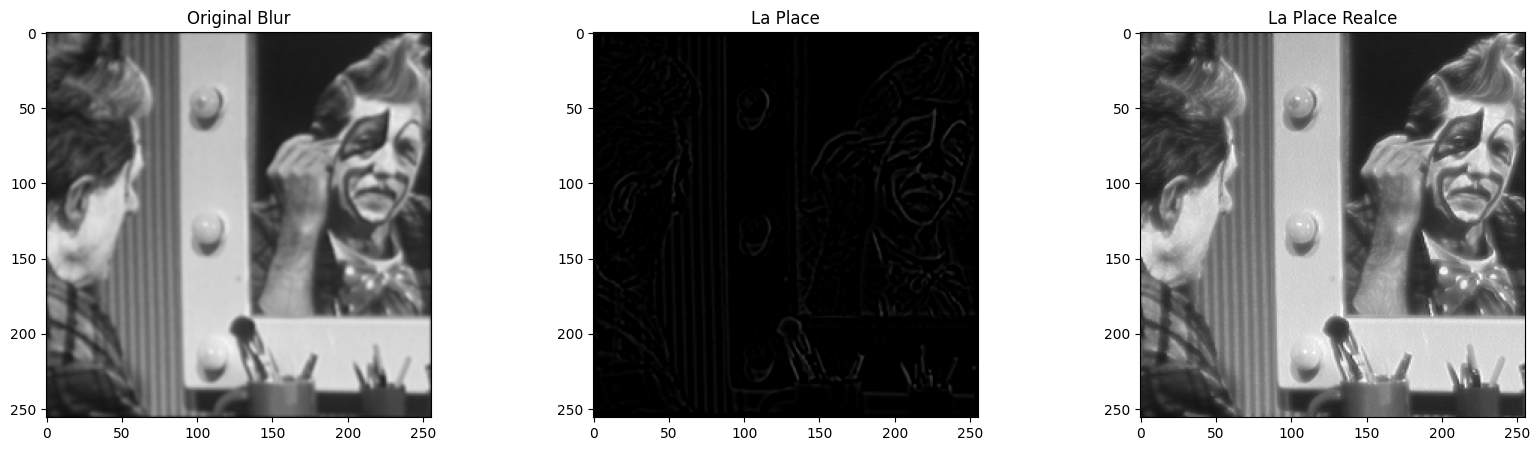

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
    
def laplace(img):
    h1 = np.array([[0, 1, 0],
                   [ 1, -4, 1],
                   [ 0,  1, 0]])
    return conv(3,img,h1)
                
c=1
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img2 = apply_gaussian_filter(img1, 1.0, 5)
img3 = laplace(img2)
img4 = img1+c*img3

plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255);
plt.title('Original Blur')

plt.subplot(1,3,2)
plt.imshow(c*img3, cmap='gray', vmin=0, vmax=255);
plt.title('La Place')

plt.subplot(1,3,3)
plt.imshow(img4, cmap='gray', vmin=0, vmax=255);
plt.title('La Place Realce')

Text(0.5, 1.0, 'G')

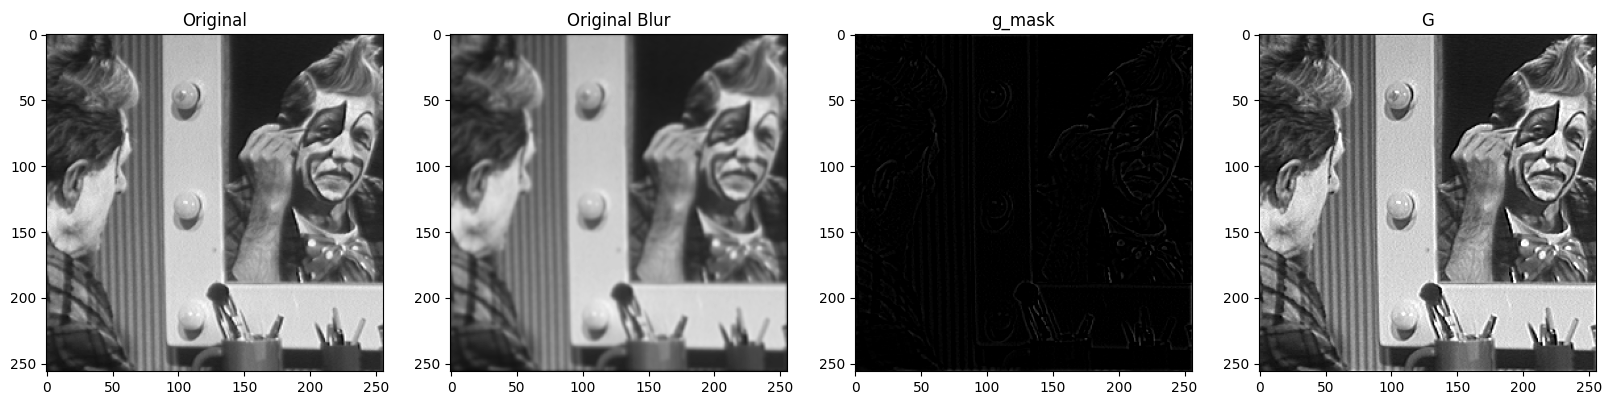

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# UNSHARP MASKING
def sharpening_filter(img, k:float):
    img_s = apply_gaussian_filter(img, 1.0, 5)
    g_mask = img - img_s
    g = img + k*g_mask
    return img_s, g_mask, g

img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img_s, g_mask, g = sharpening_filter(img,1)

plt.figure(figsize=(20, 5))
plt.axis('off')

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original')

plt.subplot(1,4,2)
plt.imshow(img_s, cmap='gray', vmin=0, vmax=255)
plt.title('Original Blur')

plt.subplot(1,4,3)
plt.imshow(g_mask, cmap='gray', vmin=0, vmax=255)
plt.title('g_mask')

plt.subplot(1,4,4)
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.title('G')

Text(0.5, 1.0, 'G')

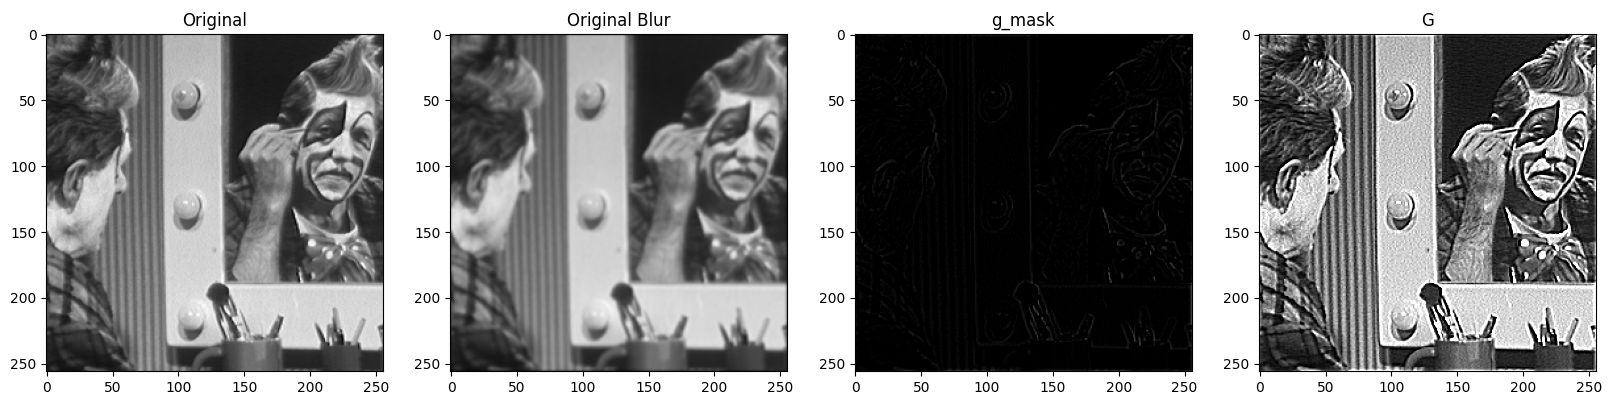

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# HIGHBOOST FILTERING K=5
def sharpening_filter(img, k:float):
    img_s = apply_gaussian_filter(img, 1.0, 5)
    g_mask = img - img_s
    g = img + k*g_mask
    return img_s, g_mask, g

img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img_s, g_mask, g = sharpening_filter(img,5)

plt.figure(figsize=(20, 5))
plt.axis('off')

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original')

plt.subplot(1,4,2)
plt.imshow(img_s, cmap='gray', vmin=0, vmax=255)
plt.title('Original Blur')

plt.subplot(1,4,3)
plt.imshow(g_mask, cmap='gray', vmin=0, vmax=255)
plt.title('g_mask')

plt.subplot(1,4,4)
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.title('G')

Text(0.5, 1.0, 'G')

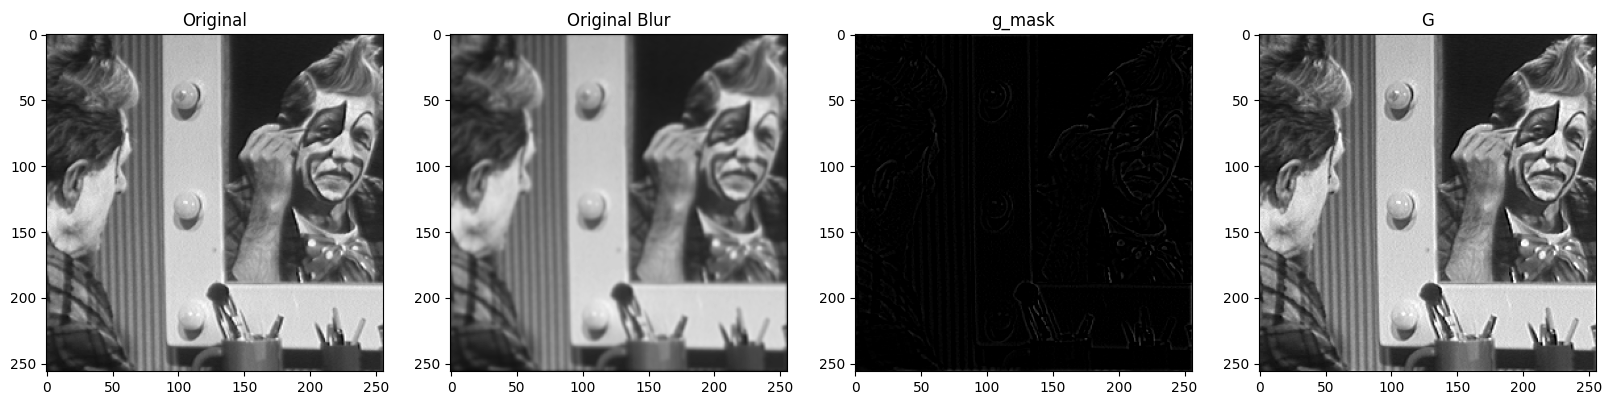

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# ATENUATE K=0.5
def sharpening_filter(img, k:float):
    img_s = apply_gaussian_filter(img, 1.0, 5)
    g_mask = img - img_s
    g = img + k*g_mask
    return img_s, g_mask, g

img = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img_s, g_mask, g = sharpening_filter(img,0.5)

plt.figure(figsize=(20, 5))

plt.subplot(1,4,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original')

plt.subplot(1,4,2)
plt.imshow(img_s, cmap='gray', vmin=0, vmax=255)
plt.title('Original Blur')

plt.subplot(1,4,3)
plt.imshow(g_mask, cmap='gray', vmin=0, vmax=255)
plt.title('g_mask')

plt.subplot(1,4,4)
plt.imshow(g, cmap='gray', vmin=0, vmax=255)
plt.title('G')

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

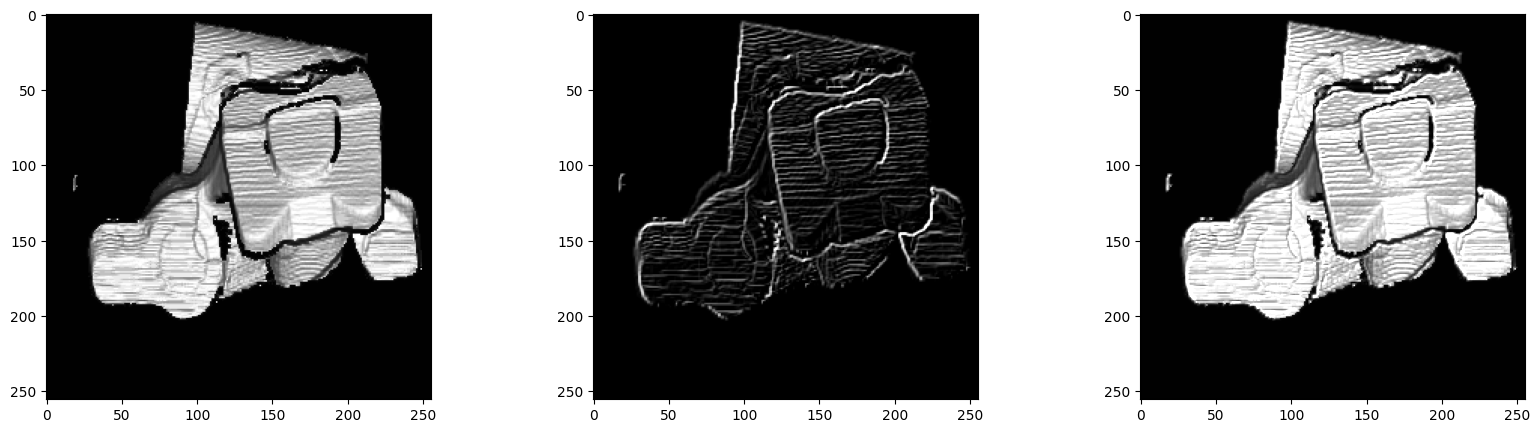

In [74]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
vertical, horizontal = sobel(img*0.25)
sobel_mask = np.abs(horizontal)+ np.abs(vertical)

img_sobel = img + sobel_mask
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,3,2)
plt.imshow(sobel_mask, cmap='gray', vmin=0, vmax=255);
plt.subplot(1,3,3)
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255);


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

Text(0.5, 1.0, 'Imagem com Sobel')

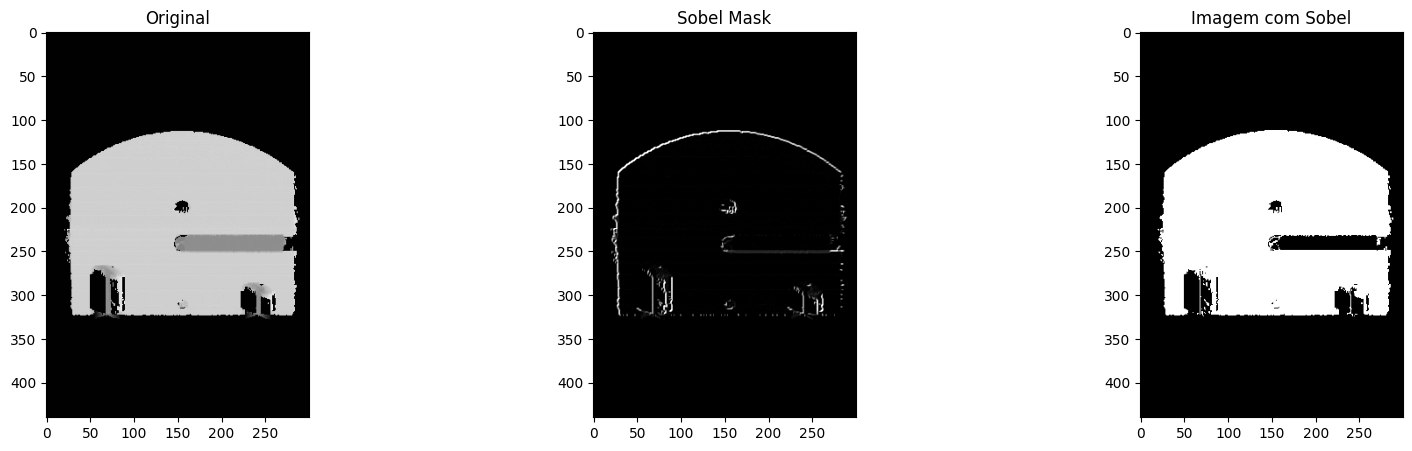

In [77]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

# Usando .25 para melhorar as bordas:
vertical, horizontal = sobel(img*0.25)
sobel_mask = np.abs(vertical) + np.abs(horizontal)
img_sobel = img + sobel_mask

# LIMIARIZACAO AAAAAAAAAAAAAAAA:
img_sobel[img_sobel >= 150] = 255
img_sobel[img_sobel < 150] = 0 

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(sobel_mask, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Mask')

plt.subplot(1,3,3)
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255);
plt.title('Imagem com Sobel')

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

Text(0.5, 1.0, 'Imagem com Sobel')

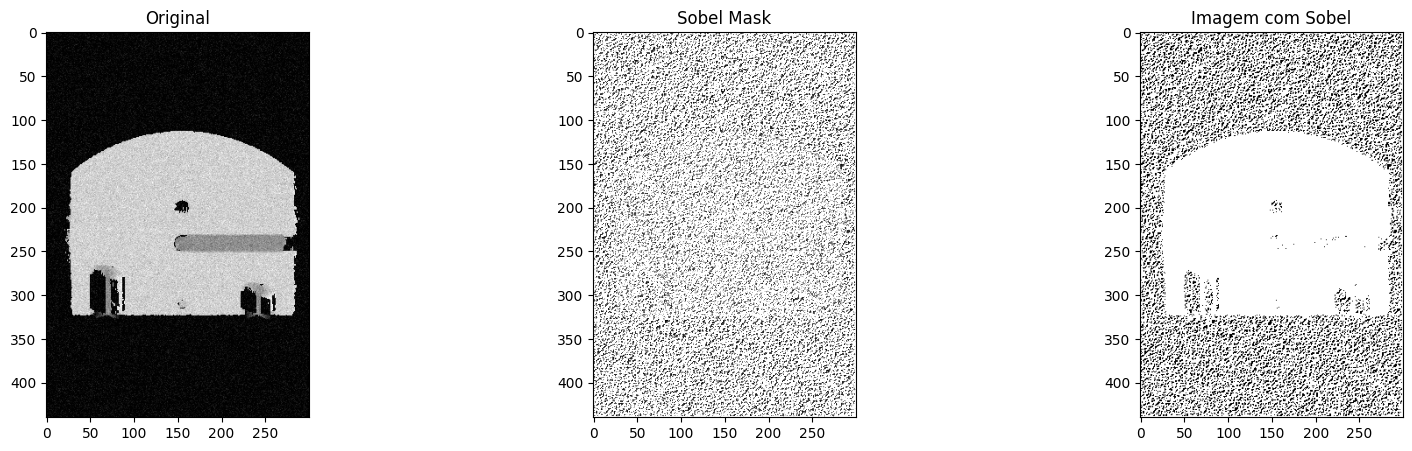

In [85]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
vertical, horizontal = sobel(img)
sobel_mask = np.abs(vertical) + np.abs(horizontal)
img_sobel = img + sobel_mask

# LIMIARIZACAO AAAAAAAAAAAAAAAA:
img_sobel[img_sobel >= 150] = 255
img_sobel[img_sobel < 150] = 0 

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(sobel_mask, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Mask')

plt.subplot(1,3,3)
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255);
plt.title('Imagem com Sobel')

Text(0.5, 1.0, 'Imagem com Sobel')

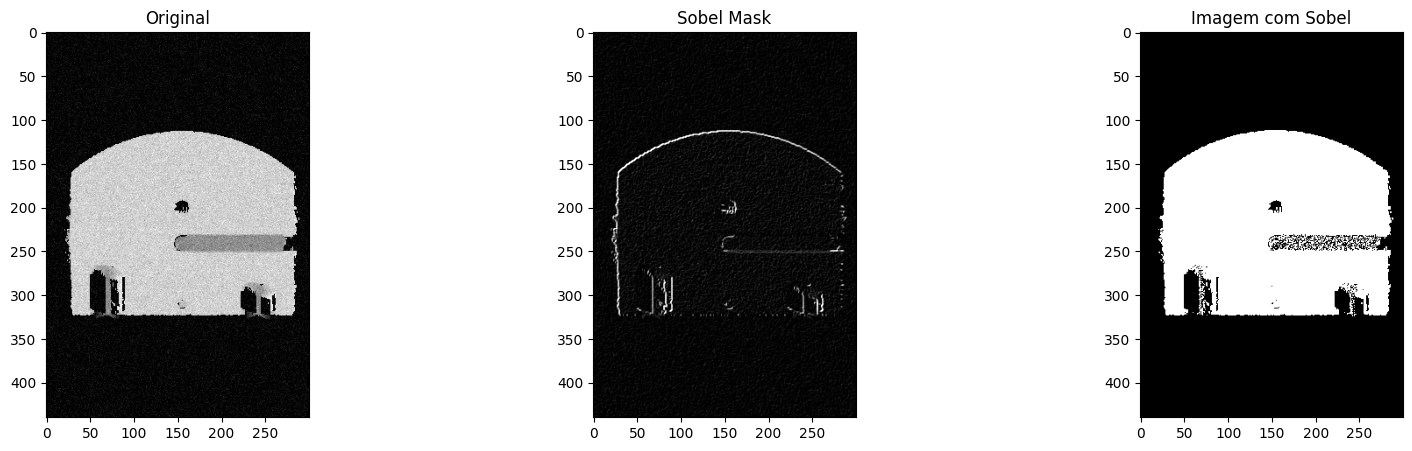

In [86]:
# COMO RESOLVER O RUIDO ABSURDO ??
# SOLUCAO RAPIDA: scale the range image by a factor 0.25
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)
vertical, horizontal = sobel(img*0.25)
sobel_mask = np.abs(vertical) + np.abs(horizontal)
img_sobel = img + sobel_mask

# LIMIARIZACAO AAAAAAAAAAAAAAAA:
img_sobel[img_sobel >= 150] = 255
img_sobel[img_sobel < 150] = 0 

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255);
plt.title('Original')

plt.subplot(1,3,2)
plt.imshow(sobel_mask, cmap='gray', vmin=0, vmax=255)
plt.title('Sobel Mask')

plt.subplot(1,3,3)
plt.imshow(img_sobel, cmap='gray', vmin=0, vmax=255);
plt.title('Imagem com Sobel')